### Load Dataset

In [682]:
import pandas as pd

In [683]:
df = pd.read_csv('TravelInsurancePrediction.csv')

### Preprocessing

In [684]:
df.dropna(inplace=True)

In [685]:
df.drop_duplicates(inplace = True)

In [686]:
x = df.drop('TravelInsurance', axis =1)

In [687]:
x_num = x[['AnnualIncome', 'Age', 'FamilyMembers']]

In [688]:
x_cat = x.drop(['AnnualIncome', 'Age', 'FamilyMembers'], axis=1)

#### One Hot Encoding untuk data x kategorikal

In [689]:
x_cat = pd.get_dummies(x_cat)

In [690]:
x = x_num.join(x_cat)
y = df['TravelInsurance']

#### Scaling data x

In [691]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

x = ss.fit_transform(x)

#### Split data train dan test

In [693]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=32)

### DNN

In [694]:
import tensorflow as tf

#### Buat Arsitektur Model Sequential

In [702]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(None, 12)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

#### Compile model

In [703]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

#### Siapkan callback EarlyStopping dengan memperhatikan train accuracy

In [704]:
monitor_callbacks = tf.keras.callbacks.EarlyStopping('accuracy', patience = 3)

#### Fitting model dengan data yang sudah di split dan callbacks

In [705]:
hasil = model.fit(x_train, y, epochs = 50, validation_split=0.3, callbacks = [monitor_callbacks])

Epoch 1/50
23/23 [==============================] - 1s 11ms/step - loss: 0.8092 - accuracy: 0.4245 - val_loss: 0.7501 - val_accuracy: 0.5080
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 0.7378 - accuracy: 0.4945 - val_loss: 0.7156 - val_accuracy: 0.4952
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 0.7011 - accuracy: 0.5549 - val_loss: 0.7010 - val_accuracy: 0.5272
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.5962 - val_loss: 0.6969 - val_accuracy: 0.5687
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.6126 - val_loss: 0.6926 - val_accuracy: 0.5623
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6705 - accuracy: 0.6181 - val_loss: 0.6898 - val_accuracy: 0.5623
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.6236 - val_loss: 0.6909 - val_accuracy: 0.5751
Epoch 8/50
23/23 [=

#### Evaluasi model dengan melihat loss dan accuracy pada data test

In [706]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6450744271278381
Test accuracy: 0.681034505367279


In [707]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Buat Grafik pada saat training data di setiap epoch

##### Akurasi Model

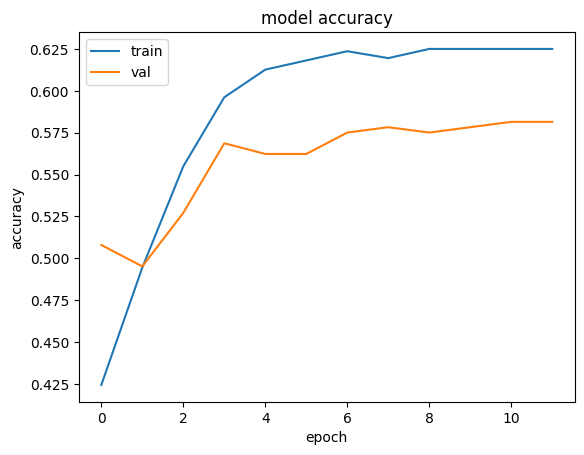

In [708]:
plt.plot(hasil.history['accuracy'])
plt.plot(hasil.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Akurasi model tergolong rendah pada val set

##### Loss Model

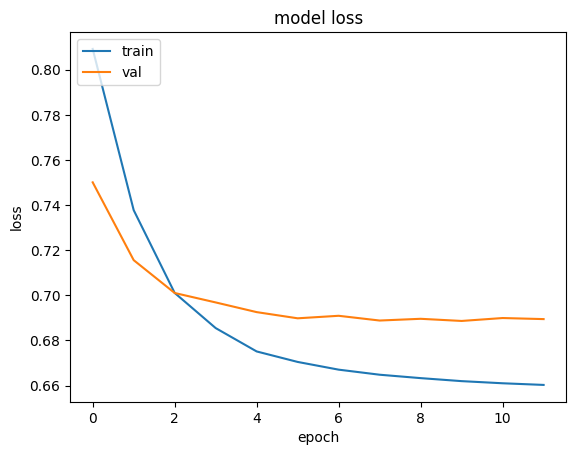

In [709]:
plt.plot(hasil.history['loss'])
plt.plot(hasil.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

loss semakin besar setiap train pada val set